In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option("display.max_colwidth", -1)
pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\lmugi\AppData\Local\Temp/ipykernel_27288/2773570825.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [2]:
df = pd.read_excel("vader sentiment line dataset.xlsx")
df 

,date,Label,preprocess_tweet,Score,Scoring String,Negativity,Positivity,Uncovered Tokens,Total Tokens,Sentiment
0,Jun-22,Digi Line,not interior yesterday send tapai customer house taman setia perdana setia alam line digi bar urban area â â,-0.500000,not (-0.50),0.500000,0.000000,18,19,Negative
1,Jun-22,Digi Line,ur line suck place fix asap already line bar always show linebar also dont haveðÿ â â,-1.000000,suck (-1.00),1.000000,0.000000,16,17,Negative
2,Jun-22,Digi Line,hi can know bought internet package rm day gb data internet line slow different buying package please explain buy every day rm,-0.666667,slow (-1.00) please (0.33),1.000000,0.333333,20,22,Negative
3,Jun-22,Digi Line,line slow day back port klang shah know seremban also face problem,-1.100000,slow (-1.00) problem (-0.10),1.100000,0.000000,10,12,Negative
4,Jun-22,Digi Line,bad right line lately central kuala lumpur oiii,-0.660000,bad (-0.66),0.660000,0.000000,7,8,Negative
...,...,...,...,...,...,...,...,...,...,...
7388,Jan-20,Unifi Line,vlive unifi lenovo tnb mane relate beg not make lose patience hope cute naughty boy perform whatever want happen internet line mcm snail laptop turn electricity blackout much,-0.743077,not (-0.50) lose (-0.66) hope (0.49) cute (0.51) want (0.08) snail (-0.66),1.820000,1.076923,22,28,Negative
7389,Jan-20,Unifi Line,unifi line melaka really challenge faith,0.538462,challenge (0.08) faith (0.46),0.000000,0.538462,4,6,Positive
7390,Jan-20,Unifi Line,unifi slow n no connection streamyx affect x line like cibai line hack bro please clarify pls open hotspot data,-0.512821,slow (-1.00) no (-0.31) like (0.38) please (0.33) pls (0.08),1.307692,0.794872,15,20,Negative
7391,Jan-20,Unifi Line,remind unifi line fast humid ade laa,1.000000,fast (1.00),0.000000,1.000000,6,7,Positive


In [3]:
def sentiment_to_numeric(Sentiment):
    if Sentiment == 'Positive':
        return 1
    elif Sentiment == 'Negative':
        return -1
    else:
        return 0

df['Sentiment Numerical Label'] = df['Sentiment'].apply(sentiment_to_numeric)
df

,date,Label,preprocess_tweet,Score,Scoring String,Negativity,Positivity,Uncovered Tokens,Total Tokens,Sentiment,Sentiment Numerical Label
0,Jun-22,Digi Line,not interior yesterday send tapai customer house taman setia perdana setia alam line digi bar urban area â â,-0.500000,not (-0.50),0.500000,0.000000,18,19,Negative,-1
1,Jun-22,Digi Line,ur line suck place fix asap already line bar always show linebar also dont haveðÿ â â,-1.000000,suck (-1.00),1.000000,0.000000,16,17,Negative,-1
2,Jun-22,Digi Line,hi can know bought internet package rm day gb data internet line slow different buying package please explain buy every day rm,-0.666667,slow (-1.00) please (0.33),1.000000,0.333333,20,22,Negative,-1
3,Jun-22,Digi Line,line slow day back port klang shah know seremban also face problem,-1.100000,slow (-1.00) problem (-0.10),1.100000,0.000000,10,12,Negative,-1
4,Jun-22,Digi Line,bad right line lately central kuala lumpur oiii,-0.660000,bad (-0.66),0.660000,0.000000,7,8,Negative,-1
...,...,...,...,...,...,...,...,...,...,...,...
7388,Jan-20,Unifi Line,vlive unifi lenovo tnb mane relate beg not make lose patience hope cute naughty boy perform whatever want happen internet line mcm snail laptop turn electricity blackout much,-0.743077,not (-0.50) lose (-0.66) hope (0.49) cute (0.51) want (0.08) snail (-0.66),1.820000,1.076923,22,28,Negative,-1
7389,Jan-20,Unifi Line,unifi line melaka really challenge faith,0.538462,challenge (0.08) faith (0.46),0.000000,0.538462,4,6,Positive,1
7390,Jan-20,Unifi Line,unifi slow n no connection streamyx affect x line like cibai line hack bro please clarify pls open hotspot data,-0.512821,slow (-1.00) no (-0.31) like (0.38) please (0.33) pls (0.08),1.307692,0.794872,15,20,Negative,-1
7391,Jan-20,Unifi Line,remind unifi line fast humid ade laa,1.000000,fast (1.00),0.000000,1.000000,6,7,Positive,1


In [4]:
new_df = df.loc[df['Sentiment Numerical Label']!=0]

In [5]:
#new_df['Sentiment'].value_counts()
new_df['Sentiment'].value_counts()

Negative    4199
Positive    2090
Name: Sentiment, dtype: int64

In [6]:
new_df.to_excel("no neutral vader sentiment line dataset.xlsx")

In [7]:
"""
from matplotlib import pyplot as plt

from wordcloud import WordCloud 

allWords = ' '.join([twts for twts in df['preprocess_tweet']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Sentiment Numerical Label'][i], df['Sentiment'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Numerical Label')
plt.ylabel('Sentiment')
plt.show()
"""

'\nfrom matplotlib import pyplot as plt\n\nfrom wordcloud import WordCloud \n\nallWords = \' \'.join([twts for twts in df[\'preprocess_tweet\']])\nwordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)\n\nplt.imshow(wordcloud, interpolation = "bilinear")\nplt.axis(\'off\')\nplt.show()\n\nplt.figure(figsize = (8,6))\nfor i in range(0, df.shape[0]):\n    plt.scatter(df[\'Sentiment Numerical Label\'][i], df[\'Sentiment\'][i], color = \'Blue\')\n\nplt.title(\'Sentiment Analysis\')\nplt.xlabel(\'Sentiment Numerical Label\')\nplt.ylabel(\'Sentiment\')\nplt.show()\n'

In [7]:
X = new_df['preprocess_tweet']
y =  new_df['Sentiment Numerical Label']

In [8]:
df.Label.value_counts()

Umobile Line    2094
Celcom Line     1849
Maxis Line      1286
Digi Line       1040
Unifi Line      1000
Name: Label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify =y)


#((X2_train.astype("U").str.lower()),(y2_train.astype("U").str.lower()))

In [10]:
#df['preprocess_tweet'] = df['preprocess_tweet'].str.replace(',', '')
#df['preprocess_tweet'].values.astype('U') 

#df['preprocess_tweet'] = df['preprocess_tweet'].astype('string')
new_df['preprocess_tweet'] = new_df['preprocess_tweet'].astype('U').values
new_df.dropna(inplace=True)
new_df.fillna(0, inplace=True)





## Tfidf vextorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.astype("U").str.lower())
X_test_vec= vectorizer.transform(X_test.astype("U").str.lower())

In [14]:
"""
from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_vec, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))
"""

"\nfrom collections import Counter\nfrom imblearn.over_sampling import SMOTE \n\nprint('Original dataset shape {}'.format(Counter(y_train)))\nsm = SMOTE(random_state=42)\nX_res, y_res = sm.fit_resample(X_train_vec, y_train)\nprint('Resampled dataset shape {}'.format(Counter(y_res)))\n"

## NB

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train_vec, y_train)

# make class predictions for X_test_vec
y_pred_class = nb.predict(X_test_vec)

In [13]:
from sklearn import metrics

# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# confusion matrix
print('confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred_class))
# classification report
print('classification report:')
print(metrics.classification_report(y_test, y_pred_class))

accuracy: 0.707
confusion matrix:
[[838   2]
 [366  52]]
classification report:
              precision    recall  f1-score   support

          -1       0.70      1.00      0.82       840
           1       0.96      0.12      0.22       418

    accuracy                           0.71      1258
   macro avg       0.83      0.56      0.52      1258
weighted avg       0.78      0.71      0.62      1258



In [14]:
from sklearn.metrics import f1_score

print('f-score: %.3f' % f1_score(y_test, y_pred_class, average='macro'))
 
# precision and recall

from sklearn.metrics import precision_score, recall_score

print('precision: %.3f' % precision_score(y_test, y_pred_class, average='macro'))
print('recall: %.3f' % recall_score(y_test, y_pred_class, average='macro'))
 
# ROC curve and AUC

#from sklearn.metrics import roc_curve, auc

#y_pred_prob = nb.predict_proba(X_test_vec)[:, 2]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#print('AUC: %.3f' % auc(fpr, tpr))

f-score: 0.520
precision: 0.829
recall: 0.561


Confusion matrix, without normalization
[[838   2]
 [366  52]]


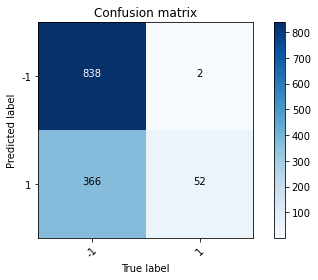

'\nfrom sklearn.metrics import confusion_matrix\n\nlabels = np.unique(y_res)\na =  confusion_matrix(y_res, y_pred_class, labels=labels)\n\npd.DataFrame(a, index=labels, columns=labels)\n'

In [15]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.tight_layout()
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-1','1'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()
 
    
"""
from sklearn.metrics import confusion_matrix

labels = np.unique(y_res)
a =  confusion_matrix(y_res, y_pred_class, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)
"""

## SVM

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = svm.SVC(kernel = 'rbf')
svcl=svm.SVC(probability=True)
clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)

# make class predictions for X_test_vec
y_pred_class = svcl.predict(X_test_vec)

from sklearn import metrics

# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# confusion matrix
print('confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred_class))
# classification report
print('classification report:')
print(metrics.classification_report(y_test, y_pred_class))

accuracy: 0.905
confusion matrix:
[[807  33]
 [ 86 332]]
classification report:
              precision    recall  f1-score   support

          -1       0.90      0.96      0.93       840
           1       0.91      0.79      0.85       418

    accuracy                           0.91      1258
   macro avg       0.91      0.88      0.89      1258
weighted avg       0.91      0.91      0.90      1258



In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_vec,y_train)
predictions = mlp.predict(X_test_vec)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[769  71]
 [ 98 320]]
              precision    recall  f1-score   support

          -1       0.89      0.92      0.90       840
           1       0.82      0.77      0.79       418

    accuracy                           0.87      1258
   macro avg       0.85      0.84      0.85      1258
weighted avg       0.86      0.87      0.86      1258



Confusion matrix, without normalization
[[807  33]
 [ 86 332]]


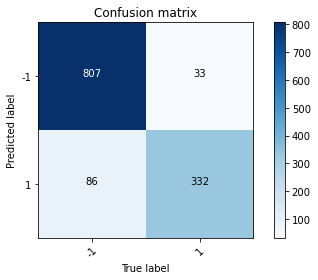

'\nfrom sklearn.metrics import confusion_matrix\n\nlabels = np.unique(y_res)\na =  confusion_matrix(y_res, y_pred_class, labels=labels)\n\npd.DataFrame(a, index=labels, columns=labels)\n'

In [18]:
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.tight_layout()
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['-1','1'],
                      title='Confusion matrix')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
 #                     title='Normalized confusion matrix')

plt.show()
 
    
"""
from sklearn.metrics import confusion_matrix

labels = np.unique(y_res)
a =  confusion_matrix(y_res, y_pred_class, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)
"""

In [19]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_vec,y_train)
predictions = mlp.predict(X_test_vec)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[769  71]
 [ 99 319]]
              precision    recall  f1-score   support

          -1       0.89      0.92      0.90       840
           1       0.82      0.76      0.79       418

    accuracy                           0.86      1258
   macro avg       0.85      0.84      0.85      1258
weighted avg       0.86      0.86      0.86      1258



In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_vec, y_train)
# make class predictions for X_test_vec
y_pred_class = logreg.predict(X_test_vec)
# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# calculate cross-validated AUC

from sklearn import metrics

# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# confusion matrix
print('confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred_class))
# classification report
print('classification report:')
print(metrics.classification_report(y_test, y_pred_class))

accuracy: 0.894
accuracy: 0.894
confusion matrix:
[[812  28]
 [105 313]]
classification report:
              precision    recall  f1-score   support

          -1       0.89      0.97      0.92       840
           1       0.92      0.75      0.82       418

    accuracy                           0.89      1258
   macro avg       0.90      0.86      0.87      1258
weighted avg       0.90      0.89      0.89      1258



In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_vec, y_train) 
y_pred_class = neigh.predict(X_test_vec)

from sklearn import metrics

# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# confusion matrix
print('confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred_class))
# classification report
print('classification report:')
print(metrics.classification_report(y_test, y_pred_class))


accuracy: 0.740
confusion matrix:
[[742  98]
 [229 189]]
classification report:
              precision    recall  f1-score   support

          -1       0.76      0.88      0.82       840
           1       0.66      0.45      0.54       418

    accuracy                           0.74      1258
   macro avg       0.71      0.67      0.68      1258
weighted avg       0.73      0.74      0.73      1258



In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_vec, y_train)

# make class predictions for X_test_vec
y_pred_class = rf.predict(X_test_vec)

from sklearn import metrics

# calculate accuracy of class predictions
print('accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred_class))
# confusion matrix
print('confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred_class))
# classification report
print('classification report:')
print(metrics.classification_report(y_test, y_pred_class))

accuracy: 0.857
confusion matrix:
[[803  37]
 [143 275]]
classification report:
              precision    recall  f1-score   support

          -1       0.85      0.96      0.90       840
           1       0.88      0.66      0.75       418

    accuracy                           0.86      1258
   macro avg       0.87      0.81      0.83      1258
weighted avg       0.86      0.86      0.85      1258

